In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
df.head()

/Users/yalinozturk/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
#simplifying the dataset
df=df[['SEVERITYCODE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INATTENTIONIND','SPEEDING']]
df.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,SPEEDING
0,2,2,0,0,2,NaN,NaN
1,1,2,0,0,2,NaN,NaN
2,1,4,0,0,3,NaN,NaN
3,1,3,0,0,3,NaN,NaN
4,2,2,0,0,2,NaN,NaN


In [4]:
#filling empty cells
df['INATTENTIONIND']=df['INATTENTIONIND'].fillna('N')
df['SPEEDING']=df['SPEEDING'].fillna('N')

In [5]:
#replacing "Y", "N" to Boolean values
df.replace(('Y','N'),(1,0),inplace=True)
df.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,SPEEDING
0,2,2,0,0,2,0,0
1,1,2,0,0,2,0,0
2,1,4,0,0,3,0,0
3,1,3,0,0,3,0,0
4,2,2,0,0,2,0,0


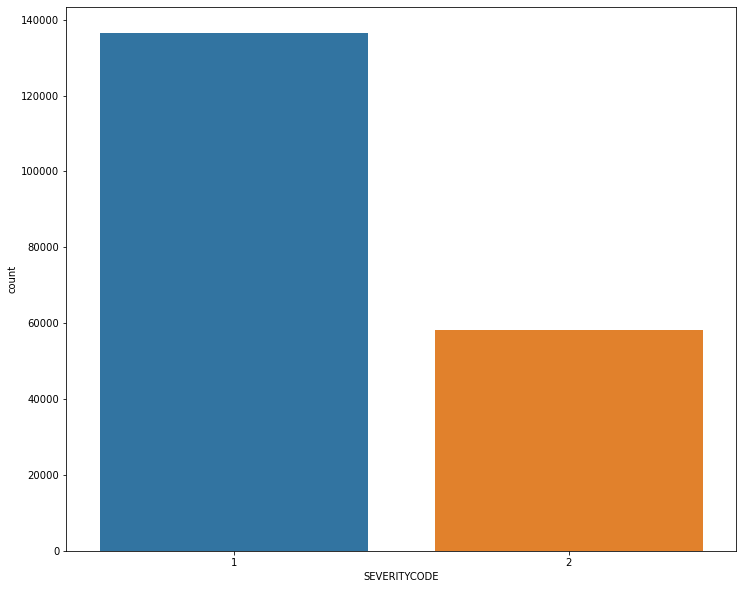

In [6]:
#bar chart
plt.figure(figsize=(12,10))
sns.countplot(x='SEVERITYCODE', data=df)

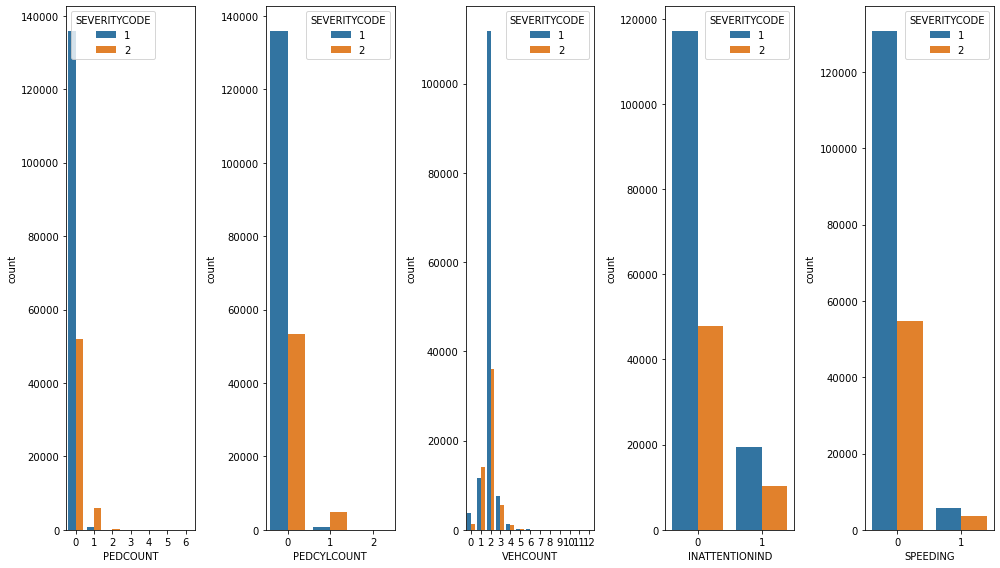

In [7]:
#creating charts for analyzing different aspects to severity
fig,(ax1,ax2,ax3,ax4,ax5)=plt.subplots(1,5,figsize=(14,8))
sns.countplot(x='PEDCOUNT',hue='SEVERITYCODE', data=df,ax=ax1)
sns.countplot(x='PEDCYLCOUNT',hue='SEVERITYCODE', data=df,ax=ax2)
sns.countplot(x='VEHCOUNT',hue='SEVERITYCODE', data=df,ax=ax3)
sns.countplot(x='INATTENTIONIND',hue='SEVERITYCODE', data=df,ax=ax4)
sns.countplot(x='SPEEDING',hue='SEVERITYCODE', data=df,ax=ax5)
fig.tight_layout()
plt.show()

In [8]:
X=df[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INATTENTIONIND','SPEEDING']].values
X[0:5]

y=df['SEVERITYCODE']
y[0:5]

0    2
1    1
2    1
3    1
4    2
Name: SEVERITYCODE, dtype: int64

In [9]:
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
#sets for training and testing
X_trainset,X_testset,y_trainset,y_testset=train_test_split(X,y,test_size=0.2,random_state=3)

In [11]:
#shape of training sets
X_trainset.shape
print('The shape of X_trainset is: ',X_trainset.shape)
y_trainset.shape
print('The shape of y_trainset is: ',y_trainset.shape)

print('The shape of X_testset is: ',X_testset.shape)
print('The shape of y_testset is: ',y_testset.shape)

The shape of X_trainset is:  (155738, 6)
The shape of y_trainset is:  (155738,)
The shape of X_testset is:  (38935, 6)
The shape of y_testset is:  (38935,)


In [12]:
#Desision Tree
accidentTree=DecisionTreeClassifier(criterion='entropy',max_depth=4)
accidentTree.fit(X_trainset,y_trainset)
predTree=accidentTree.predict(X_testset)
Treef1=f1_score(y_testset,predTree,average='weighted')
Treeacc=accuracy_score(y_testset,predTree)

In [13]:
#K-Nearest Neighbours
KNN=KNeighborsClassifier(n_neighbors=4).fit(X_trainset,y_trainset)
predKNN=KNN.predict(X_testset)
KNNf1=f1_score(y_testset,predKNN,average='weighted')
KNNacc=accuracy_score(y_testset,predKNN)

In [14]:
#Logistic Regression
LR=LogisticRegression(C=0.01,solver='liblinear').fit(X_trainset,y_trainset)
predLR=LR.predict(X_testset)
LRf1=f1_score(y_testset,predLR,average='weighted')
LRacc=accuracy_score(y_testset,predLR)

In [15]:
#F1 and Accuracy Scores
score={
    'Model':['Decision Tree','KNN','Logistic Regression'],
    'F1 Score': [Treef1,KNNf1,LRf1],
    'Accuracy': [Treeacc,KNNacc,LRacc]
}

score=pd.DataFrame(score)
score

,Model,F1 Score,Accuracy
0,Decision Tree,0.683253,0.747785
1,KNN,0.681430,0.732657
2,Logistic Regression,0.692335,0.748170
